# Week 08, Graph2

- Data Load
- Network Analysis
  - small world
  - motif
  - graph role
  - community detection

# 1. data load

In [ ]:
! pip install networkx

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

## 1) data download



In [ ]:
import urllib.request as urllib
import io
import zipfile

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data 
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
g = nx.parse_gml(gml)  # parse gml data

print(txt)
# print degree for each team - number of games
for n, d in g.degree():
    print(f"{n:20} {d:2}")

options = {
    "node_color": "black",
    "node_size": 50,
    "linewidths": 0,
    "width": 0.1,
}
nx.draw(g, **options)
plt.show()

In [ ]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 115
Number of edges: 613
Average degree:  10.6609


In [ ]:
g.nodes.data()

NodeDataView({'BrighamYoung': {'value': 7}, 'FloridaState': {'value': 0}, 'Iowa': {'value': 2}, 'KansasState': {'value': 3}, 'NewMexico': {'value': 7}, 'TexasTech': {'value': 3}, 'PennState': {'value': 2}, 'SouthernCalifornia': {'value': 8}, 'ArizonaState': {'value': 8}, 'SanDiegoState': {'value': 7}, 'Baylor': {'value': 3}, 'NorthTexas': {'value': 10}, 'NorthernIllinois': {'value': 6}, 'Northwestern': {'value': 2}, 'WesternMichigan': {'value': 6}, 'Wisconsin': {'value': 2}, 'Wyoming': {'value': 7}, 'Auburn': {'value': 9}, 'Akron': {'value': 6}, 'VirginiaTech': {'value': 1}, 'Alabama': {'value': 9}, 'UCLA': {'value': 8}, 'Arizona': {'value': 8}, 'Utah': {'value': 7}, 'ArkansasState': {'value': 10}, 'NorthCarolinaState': {'value': 0}, 'BallState': {'value': 6}, 'Florida': {'value': 9}, 'BoiseState': {'value': 11}, 'BostonCollege': {'value': 1}, 'WestVirginia': {'value': 1}, 'BowlingGreenState': {'value': 6}, 'Michigan': {'value': 2}, 'Virginia': {'value': 0}, 'Buffalo': {'value': 6}, 'S

In [ ]:
g.edges.data()

EdgeDataView([('BrighamYoung', 'FloridaState', {}), ('BrighamYoung', 'NewMexico', {}), ('BrighamYoung', 'SanDiegoState', {}), ('BrighamYoung', 'Wyoming', {}), ('BrighamYoung', 'Utah', {}), ('BrighamYoung', 'Virginia', {}), ('BrighamYoung', 'Syracuse', {}), ('BrighamYoung', 'ColoradoState', {}), ('BrighamYoung', 'MississippiState', {}), ('BrighamYoung', 'UtahState', {}), ('BrighamYoung', 'AirForce', {}), ('BrighamYoung', 'NevadaLasVegas', {}), ('FloridaState', 'NorthCarolinaState', {}), ('FloridaState', 'Florida', {}), ('FloridaState', 'Virginia', {}), ('FloridaState', 'GeorgiaTech', {}), ('FloridaState', 'Duke', {}), ('FloridaState', 'Louisville', {}), ('FloridaState', 'NorthCarolina', {}), ('FloridaState', 'MiamiFlorida', {}), ('FloridaState', 'Clemson', {}), ('FloridaState', 'WakeForest', {}), ('FloridaState', 'Maryland', {}), ('Iowa', 'KansasState', {}), ('Iowa', 'PennState', {}), ('Iowa', 'Northwestern', {}), ('Iowa', 'WesternMichigan', {}), ('Iowa', 'Wisconsin', {}), ('Iowa', 'Ohi

## 2) draw graph

In [ ]:
nx.write_graphml_lxml(g, "conference.graphml", infer_numeric_types=True)

## Node Centrality
- degree centrality : 연결된 node가 많을 수록 큼. nx.degree_centrality(g), nx.in_degree_centrality(g), nx.out_degree_centrality(g)
- closeness centrality : 모든 node와의 거리가 가까울 수록 큼. nx.closeness_centrality(g)
- betweenness centrality : 노드 간의 경로에 있을 수록 큼. nx.betweenness_centrality(g, normalized=True)
- eigenvector centrality : 큰 네트워크와 연결되있는 사람일 수록 큼. nx.eigenvector_centrality(g)

In [ ]:
#visualize the network such that the node color varies with Degree and node size with Betweenness Centrality.

pos = nx.spring_layout(g)
betCent = nx.betweenness_centrality(g,normalized=True)
node_color = [20000.0 * g.degree(v) for v in g]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(g, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [ ]:
betCent = nx.betweenness_centrality(g)
sorted(betCent.items(), key = (lambda x: x[1]), reverse=True)

# 2. Network Analysis
- degree, centrality 등은 5주차 [lab]graph1 참고

## 1) Small world
- reference : https://networkx.org/documentation/stable/reference/algorithms/smallworld.html
- sigma = C/Cr / L/Lr
- C and L are respectively the average clustering coefficient and average shortest path length of G. 
- Cr and Lr are respectively the average clustering coefficient and average shortest path length of an equivalent random graph.
- A graph is commonly classified as small-world if sigma>1.

In [ ]:
from networkx.algorithms import smallworld as sw

In [ ]:
g_random = sw.random_reference(g, niter=20, seed=2021)
print(nx.info(g_random))

Name: 
Type: Graph
Number of nodes: 115
Number of edges: 613
Average degree:  10.6609


In [ ]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 115
Number of edges: 613
Average degree:  10.6609


In [ ]:
C = nx.average_clustering(g)
L = nx.average_shortest_path_length(g)

In [ ]:
Cr = nx.average_clustering(g_random)
Lr = nx.average_shortest_path_length(g_random)

In [ ]:
A = (C / Cr)
B = (L / Lr)

In [ ]:
#A graph is commonly classified as small-world if sigma>1
sigma =  A / B
sigma

4.643321690024574

In [ ]:
sw_sigma = sw.sigma(g, niter=20, seed=2021)
sw_sigma

4.539317382484467

## 2) motif

In [ ]:
# https://pypi.org/project/netsci/
! pip install netsci

In [ ]:
import numpy as np #netsci가 그래프를 넘파이 매트릭스 형태로 받는다
import netsci.visualization as nsv #시각화 해주는 모듈
import netsci.metrics.motifs as nsm #motif 구해주는 모듈

In [ ]:
# networkx to numpy
#netsci가 그래프를 넘파이 매트릭스 형태로 표현하기 때문에 바꿔준다
g_np = nx.convert_matrix.to_numpy_matrix(g,dtype=np.integer)
g_r_np = nx.convert_matrix.to_numpy_matrix(g_random,dtype=np.integer)
print(g_np)
print(g_r_np)

In [ ]:
# recurring : count subgraphs
#nsm.motifs: #node=3인 subgraph 기준으로 motif 구하기(앞의 3개는 수업시간에 안 배운 것이라서 제외)
f_real = nsm.motifs(g_np)[3:] 
f_random = nsm.motifs(g_r_np)[3:]
f_real = np.concatenate((np.array([0, 0, 0]), f_real), axis=None)  
f_random = np.concatenate((np.array([0, 0, 0]), f_random), axis=None)
print(f_real)
print(f_random)

[   0    0    0    0    0    0    0    0    0    0 3537    0    0    0
    0  810]
[   0    0    0    0    0    0    0    0    0    0 5499    0    0    0
    0  156]


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


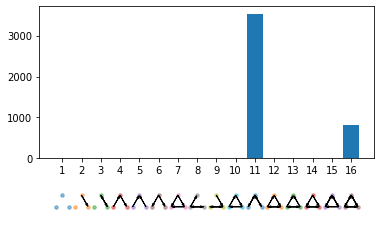

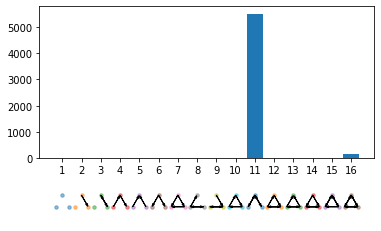

In [ ]:
# visualization of motifs
nsv.bar_motifs(f_real)
nsv.bar_motifs(f_random)

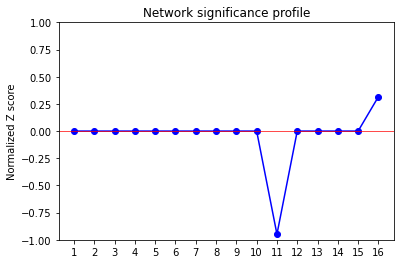

<Figure size 432x288 with 0 Axes>

In [ ]:
import math

#significant: more frequent than expected
z_list = []
for idx, n_real in enumerate(f_real):
  n_rand = f_random[idx]
  z = (n_real-n_rand) / np.std(f_random)
  z_list.append(z)


z_list = np.array(z_list)
z_sum = np.sum(z_list**2)
sp_list = []
for idx, z in enumerate(z_list):
  sp = z/math.sqrt(z_sum)
  sp_list.append(sp)


plt.title("Network significance profile")
plt.ylabel("Normalized Z score")
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], sp_list, 'bo-')
plt.axhline(y=0, color='r', linewidth=0.7)
plt.ylim(-1.0, 1.0)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
plt.show()

## 3) graph role
- reference: https://github.com/dkaslovsky/GraphRole
- https://pypi.org/project/graphrole/

In [ ]:
! pip install graphrole

In [ ]:
from pprint import pprint
import seaborn as sns

#RecursiveFeatureExtractor -> node의 feature(degree, edge, ...)를 추출하는 함수
#RoleExtractor -> node의 role을 추출하는 함수
from graphrole import RecursiveFeatureExtractor, RoleExtractor

In [ ]:
# extract features
feature_extractor = RecursiveFeatureExtractor(g)
features = feature_extractor.extract_features()

In [ ]:
print(features)

In [ ]:
# assign node roles
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)
node_roles = role_extractor.roles

In [ ]:
print('\nNode role assignments:')
pprint(node_roles)

print('\nNode role membership by percentage:')
print(role_extractor.role_percentage.round(2))

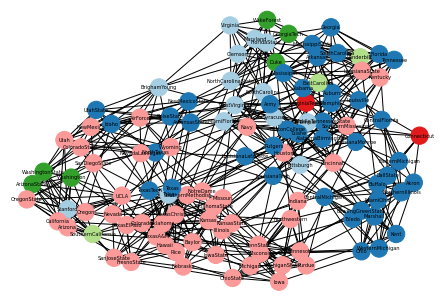

In [ ]:
# build color palette for plotting
unique_roles = sorted(set(node_roles.values()))
color_map = sns.color_palette('Paired', n_colors=len(unique_roles))
# map roles to colors
role_colors = {role: color_map[i] for i, role in enumerate(unique_roles)}
# build list of colors for all nodes in G
node_colors = [role_colors[node_roles[node]] for node in g.nodes]

# plot graph
plt.figure()
nx.draw(
    g,
    pos=nx.spring_layout(g, seed=42),
    with_labels=True,
    node_color=node_colors,
    font_size = 5
)
plt.show()
plt.savefig('graph_role.png', dpi=200)

## 4) Community Detection

In [ ]:
from networkx.algorithms import community
list(community.asyn_fluidc(g,k=12))

In [ ]:
#community_asyn_fluidc에 의해 community가 제대로 감지되었는지 알아보기 위해 conference 기준으로 community를 감지하여 두 결과를 비교하였다.
conference_community = {}
for i in range(12):
  conference_community[i] = []

nodeData = g.nodes.data()
for team, conference in nodeData:
  conference_num = conference['value']
  conference_community[conference_num].append(team)  

for key, value in conference_community.items():
  conference_community[key] = sorted(value)

conference_community